# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [19]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\dataset_custom.csv')

# Anforderungen 9: Evaluation

Setzen Sie die Aufgabenstellung für ein Prädiktionsmodell um -- wahlweise für Ihr Klassifikationsmodell oder Ihr Regressionsmodell aus den Anforderungen aus den entsprechenden Kapiteln.

In [ ]:
# Für die Evaluation wird das Klassifikationsmodell aus Projektarbeit_A6 gewählt, da dort einige Experimente durchgeführt wurden und ein relativ 
# guter Wert für die Vorhersage von Rauchern (Percission = 70%) erzielt wurde. 

Definieren Sie für Ihr Modell die Frequenzbaseline bzw. die Mittelwertsbaseline.

In [11]:
# Laden des Modelles aus Projektarbeit_A6

# Erstellung einer Zielvariablen-Spalte aus den Raucher-Features (Zusammenführen):

def create_raucher_ziel(row):
    if row['Raucher_nie'] == 1:
        return 1
    elif row['Raucher_ehem'] == 1:
        return 2
    elif row['Raucher_aktiv'] == 1:
        return 3
    else:
        return None  # Oder einen Standardwert, je nach Anforderungen

# Neue Zielspalte erstellen:

dataset['Raucher_Ziel'] = dataset.apply(create_raucher_ziel, axis=1)

data = dataset.drop(columns=['Raucher_nie', 'Raucher_ehem', 'Raucher_aktiv'])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Raucher_Ziel']), data['Raucher_Ziel'], test_size=0.2, random_state=42)

X_train

# Laden:

loaded_feature_model = joblib.load('Modelle/feature_selection_A6.joblib')


# Parameter ausgeben:

# print('Feature_names_out: ' + str(loaded_feature_model.get_feature_names_out()))
# print('Feature_names_in: ' + str(loaded_feature_model.feature_names_in_))
# print('Model: ' + str(loaded_feature_model))

X_train_selected = loaded_feature_model.transform(X_train)
X_test_selected = loaded_feature_model.transform(X_test)

# Corr Model 1:
sf_corr = X_train[['Geschlecht', 'Alter', 'Größe', 
                   'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

sf_corr_test = X_test[['Geschlecht', 'Alter', 'Größe', 
                       'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]



c:\Users\josua\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\josua\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator SelectFromModel from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


c:\Users\josua\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


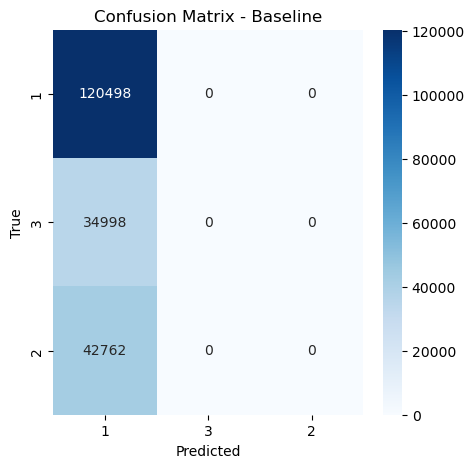

Accuracy (Baseline): 0.61
Precision (Baseline): 0.37
Recall (Baseline): 0.61
F1 score (Baseline): 0.46


In [20]:
from sklearn.dummy import DummyClassifier

# Erstelle ein DummyClassifier mit der Strategie 'most_frequent'
baseline_model = DummyClassifier(strategy='most_frequent')

# Trainiere das Basismodell
baseline_model.fit(sf_corr, y_train)

# Mache Vorhersagen auf dem Testset
y_pred_baseline = baseline_model.predict(sf_corr_test)

# Evaluationsmetriken berechnen
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='weighted')
recall_baseline = recall_score(y_test, y_pred_baseline, average='weighted')
f1_baseline = f1_score(y_test, y_pred_baseline, average='weighted')

# Confusion Matrix erstellen und anzeigen
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique(), yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Baseline')
plt.show()

# Ausgabe der Metriken
print(f'Accuracy (Baseline): {accuracy_baseline:.2f}')
print(f'Precision (Baseline): {precision_baseline:.2f}')
print(f'Recall (Baseline): {recall_baseline:.2f}')
print(f'F1 score (Baseline): {f1_baseline:.2f}')

Definieren Sie für Ihr Modell eine einfache Vergleichsbaseline.


Prüfen Sie mittels einer Lernkurve, ob Ihr Modell zu Over- oder Underfitting neigt und evaluieren Sie entsprechend des Ergebnisses ein mächtigeres oder weniger mächtiges Modell. Wenn Ihr Modell weder Over- noch Underfitting zeigt: Herzlichen Glückwunsch, es ist nichts weiter zu tun.


Interpretieren Sie Ihr Modell: Entweder mit Hilfe von LIME oder bei transparenten Algorithmen aufgrund des gelernten Modells selber.